1.  Create Dataset Directory

In [14]:
from pathlib import Path


def dataset_dir():
    data_dir = Path("../data")
    number = len([dataset for dataset in data_dir.glob("dataset_*")])
    path = data_dir/"dataset_{:0>3}".format(number)
    return path    

2. Create Images & Acceleration Subfolder

In [15]:
road_types = [
    "asphalted",
    "paved",
    "unpaved"
]

dataset_path = dataset_dir()

(dataset_path / "images").mkdir(parents=True, exist_ok=True)

# for road_type in road_types:
#     (dataset_path / "images" /road_type).mkdir(parents=True, exist_ok=True)

(dataset_path / "acceleration").mkdir(parents=True, exist_ok=True)

In [4]:
# import pandas as pd
# import math
# from csv import reader
# import json
# import csv



# quality_filenames = [
#     "good.csv",
#     "medium.csv",
#     "bad.csv"
# ]

# file_path = '../data/raw/000_070222/labels.json'
# with open(file_path, 'r') as fp:
#     data = json.load(fp)
#     json_lines = data["road_quality"][:][:]


# csv_fromdir = '../data/raw/000_070222/dd.csv'


# with open(csv_fromdir) as f:
#     firstColumn = [line.split(',')[0] for line in f]

# lst = []
# for each in firstColumn:
#     lst.append(str(each).split('.')[0])



# for json_line in json_lines:
#     quality = json_line[0]
#     start_acc = json_line[1]
#     end_acc = json_line[2]

#     csv_todir = dataset_path / "acceleration" / quality_filenames[quality]
    
#     if csv_todir.exists():
#         n=n
#     else:
#         n=0

#     for i in lst[1:]:
        
#         if start_acc <= int(i) <= end_acc:
#             if n==0:
#                 df = pd.read_csv(csv_fromdir)
#                 df=df.loc[[0],:]
#                 df.to_csv(csv_todir, index=False, mode='a', header=True)
#             else:
#                 df = pd.read_csv(csv_fromdir)
#                 df=df.loc[[n],:]
#                 df.to_csv(csv_todir, index=False, mode='a', header=False)
#             n += 1
#         else:
#             continue


4. Sort Acceleration data 

In [5]:
import pandas as pd
import math
from csv import reader
import json
import csv
import sys



quality_filenames = [
    "good.csv",
    "medium.csv",
    "bad.csv"
]

file_path = '../data/raw/000_070222/labels.json'
with open(file_path, 'r') as fp:
    data = json.load(fp)
    json_lines = data["road_quality"][:][:]


csv_fromdir = '../data/raw/000_070222/dd.csv'


with open(csv_fromdir) as f:
    firstColumn = [line.split(',')[0] for line in f]

lst = []
for each in firstColumn:
    lst.append(str(each).split('.')[0])

total_acc = len(lst)
print(total_acc)

# last element of acc
print(lst[-1])

time = lst[-1] - lst[1]
print(lst[1])
print(time)

n=0

# check if label.json correct
for json_line in json_lines:
    start_acc = json_line[1]
    end_acc = json_line[2]
    if end_acc > start_acc:
        pass
    else:
        print("wrong label.json input")
        sys.exit()

print(json_line)

for json_line in json_lines:
    quality = json_line[0]
    start_acc = json_line[1]
    end_acc = json_line[2]

    csv_todir = dataset_path / "acceleration" / quality_filenames[quality]
    
    if csv_todir.exists():
        n=1
    else:
        n=0
    
    start_index=0
    end_index=0
    df1=0
    df2=0


    if str(start_acc) in lst:
        start_index=lst.index(str(start_acc))
        start_index=start_index-1

    if str(end_acc+1) in lst:
        end_index=lst.index(str(end_acc+1))
        print(end_index)
        end_index=end_index-1
    else:
        # last element in list
        end_index=len(lst)-1


    for i in range(start_index, end_index):
        if n==0:
            df = pd.read_csv(csv_fromdir)
            df=df.loc[[start_index],:]
            df.to_csv(csv_todir, index=False, mode='a', header=True)
            n=1
        else:
            df = pd.read_csv(csv_fromdir)
            df=df.loc[[i],:]
            df.to_csv(csv_todir, index=False, mode='a', header=False)


name = "000_070222"
csv_fromdir = Path("../data") /"raw"/name/"gps.csv"
df = pd.read_csv(csv_fromdir)
df.to_csv(dataset_path, index=False, mode='a', header=True)







20172
188
532


3. Sort Image data

In [17]:
import os
import json
import shutil
from PIL import Image
# shift positive when shift right
shift = -15
name = "000_070222"
imagedir = Path("../data")/"raw"/name/"images"
print(imagedir)

road_types = [
    "asphalted",
    "paved",
    "unpaved"
]

new_width = 128
new_height = 128

# script_dir = Path('images')
file_path = '../data/raw/000_070222/labels.json'
with open(file_path, 'r') as fp:
    data = json.load(fp)
    print(data["road_type"][0][1])
    json_lines = data["road_type"][:][:]

for json_line in json_lines:
    start_image = json_line[1]
    end_image = json_line[2]
    if end_image > start_image:
        pass
    else:
        print("wrong label.json input")
        sys.exit()

print(json_line)

for json_line in json_lines:
    typ = json_line[0]
    start_image = json_line[1]
    end_image = json_line[2]

    path_typ = dataset_path / "images" / road_types[typ]


    for image_number in range(start_image, end_image+1):
        for last_number in range(0, 10):
            imagepath = str(image_number) + "_{0:02d}".format(last_number) + ".jpg"
            copyintopath = path_typ
            copyfrompath = Path(imagedir / imagepath)
            if copyfrompath.exists():
                im = Image.open(copyfrompath)
                width, height = im.size
                left = width/2 - new_width/2 + shift
                new_height1 = (new_height + (1/8)*height)
                top = height - new_height1
                right = width/2 + new_width/2 + shift
                bottom = top + new_height

                # Crop the center of the image
                im1 = im.crop((left, top, right, bottom))

                if copyintopath.exists():
                    shutil.copy(copyfrompath, copyintopath)
                else:
                    (copyintopath).mkdir(parents=True, exist_ok=True)
                    shutil.copy(copyfrompath, copyintopath)
            else:
                pass

print(im1.size)


..\data\raw\000_070222\images
1644243896
..\data\dataset_028\images\asphalted
..\data\dataset_028\images\paved
..\data\dataset_028\images\unpaved


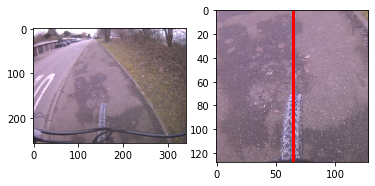

In [40]:
# new_width = 128
# new_height = 128
# # shift positive when shift right
# shift = -15
# import matplotlib.pyplot as plt
# from PIL import Image

# im = Image.open("../data/dataset_028/acceleration/1645533148_0.jpg")
# width, height = im.size
# left = width/2 - new_width/2 + shift
# new_height1 = (new_height + (1/8)*height)
# top = height - new_height1
# right = width/2 + new_width/2 + shift
# bottom = top + new_height

# # Crop the center of the image
# im1 = im.crop((left, top, right, bottom))

# # im1.show()
# f = plt.figure()
# f.add_subplot(1,2, 1)
# plt.imshow(im)
# f.add_subplot(1,2, 2)

# # find shift value
# x = [64, 64]
# y = [0, 128]
# plt.plot(x, y, color="red", linewidth=3)

# plt.imshow(im1)
# plt.show(block=True)

In [19]:
import os

blacklist = ["001_220222"]
available_raw_data = os.listdir("../data/raw")


for ele in blacklist:
    if ele in available_raw_data:
        available_raw_data.remove(ele)

whitelist = available_raw_data

print(whitelist)

# # formatierung noch anpassen 
# csv_todir = dataset_path/"config.json"
# df = whitelist
# df.to_csv(csv_todir, index=False, mode='a', header=False)




[]


 Create config.json

In [7]:
import os
from pathlib import Path

name = "000_070222"
imagedir = Path("../data")/"raw"/name/"images"

number_of_images = len(os.listdir(imagedir))
print(number_of_images)

road_types = [
    "asphalted",
    "paved",
    "unpaved"
]
path_typ = dataset_path / "images" / road_types[0]
if path_typ.exists():
    number_of_images_asph = len(os.listdir(path_typ))
    print(number_of_images_asph)


path_typ = dataset_path / "images" / road_types[1]
if path_typ.exists():
    number_of_images_pav = len(os.listdir(path_typ))
    print(number_of_images_pav)

path_typ = dataset_path / "images" / road_types[2]
if path_typ.exists():
    number_of_images_unpav = len(os.listdir(path_typ))
    print(number_of_images_unpav)

quality_filenames = [
    "good.csv",
    "medium.csv",
    "bad.csv"
]

path_typ = dataset_path / "acceleration" / quality_filenames[0]
if path_typ.exists():
    number_of_images_asph = len(os.listdir(path_typ))
    print(number_of_images_asph)


path_typ = dataset_path / "acceleration" / quality_filenames[1]
if path_typ.exists():
    number_of_images_pav = len(os.listdir(path_typ))
    print(number_of_images_pav)

path_typ = dataset_path / "acceleration" / quality_filenames[2]
if path_typ.exists():
    number_of_images_unpav = len(os.listdir(path_typ))
    print(number_of_images_unpav)


datum=os.stat(dataset_path).st_ctime
print(datum)






2956


In [16]:
import json
import datetime

info = {
    "date": datetime.datetime.now().strftime("%d.%m.%Y"), 
    "images": {
        "total": 0,
        "asphalted": None, 
        "paved": None, 
        "unpaved": None
    },
    "acceleration": {
        "total": None,
        "good": None, 
        "medium": None, 
        "bad": None
    },
    "recording_time": None,
    "image_size": 110,
    "raw_content": ["000_070222", "000_070222", "000_072", "000_070222", "000_070222", "000_070222"]
}

with open(dataset_path/"config.json", "w") as outfile:
    json.dump(info, outfile, indent=4, sort_keys=False)

In [11]:
available_raw_data = [raw.name for raw in Path("../data/raw").glob("*")]
print(available_raw_data)

['000_070222']
